In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("RTA Dataset.csv")
data

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [3]:
data.shape

(12316, 32)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [5]:
data.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Defect_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
       'Road_allignment', 'Types_of_Junction', 'Road_surface_type',
       'Road_surface_conditions', 'Light_conditions', 'Weather_conditions',
       'Type_of_collision', 'Number_of_vehicles_involved',
       'Number_of_casualties', 'Vehicle_movement', 'Casualty_class',
       'Sex_of_casualty', 'Age_band_of_casualty', 'Casualty_severity',
       'Work_of_casuality', 'Fitness_of_casuality', 'Pedestrian_movement',
       'Cause_of_accident', 'Accident_severity'],
      dtype='object')

In [ ]:
RTA_by_age = data[['Age_band_of_driver', 'Accident_severity']]

In [ ]:
mask = RTA_by_age.groupby(['Accident_severity', 'Age_band_of_driver']).size().reset_index(name='count')


,Accident_severity,Age_band_of_driver,count
0,Fatal injury,18-30,62
1,Fatal injury,31-50,54
2,Fatal injury,Over 51,24
3,Fatal injury,Under 18,12
4,Fatal injury,Unknown,6
5,Serious Injury,18-30,604
6,Serious Injury,31-50,541
7,Serious Injury,Over 51,257
8,Serious Injury,Under 18,169
9,Serious Injury,Unknown,172


In [37]:
total_count = mask.groupby('Age_band_of_driver')['count'].transform('sum')
mask['ratio'] = mask['count'] / total_count

mask

,Accident_severity,Age_band_of_driver,count,ratio
0,Fatal injury,18-30,62,0.014517
1,Fatal injury,31-50,54,0.013213
2,Fatal injury,Over 51,24,0.015142
3,Fatal injury,Under 18,12,0.014545
4,Fatal injury,Unknown,6,0.003876
5,Serious Injury,18-30,604,0.141419
6,Serious Injury,31-50,541,0.132371
7,Serious Injury,Over 51,257,0.162145
8,Serious Injury,Under 18,169,0.204848
9,Serious Injury,Unknown,172,0.111111


<Axes: title={'center': 'Accidents_per_age'}, xlabel='Age_band_of_driver', ylabel='ratio'>

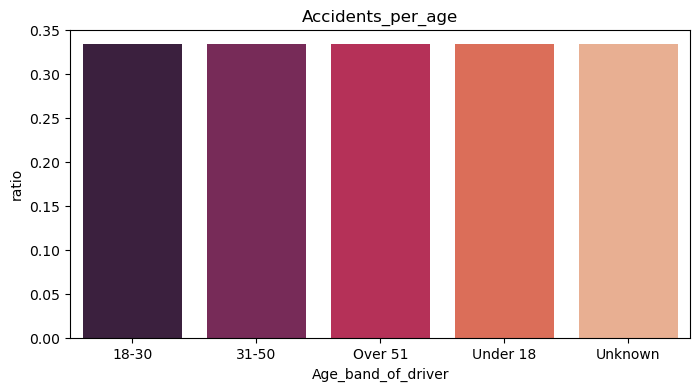

In [53]:
plt.figure(figsize=(8, 4))
plt.title('Accidents_per_age')
sns.barplot(mask, x='Age_band_of_driver', y= 'ratio', hue='Age_band_of_driver', errorbar=None, palette = 'rocket')


In [54]:
RTA_by_cause = data[['Cause_of_accident', 'Accident_severity']]

In [57]:
mask2 = RTA_by_cause.groupby(['Cause_of_accident']).size().reset_index(name='count')
mask2

,Cause_of_accident,count
0,Changing lane to the left,1473
1,Changing lane to the right,1808
2,Driving at high speed,174
3,Driving carelessly,1402
4,Driving to the left,284
5,Driving under the influence of drugs,340
6,Drunk driving,27
7,Getting off the vehicle improperly,197
8,Improper parking,25
9,Moving Backward,1137


In [66]:
mask2['ratio'] = mask2['count']/sum(mask2['count'])
mask2


,Cause_of_accident,count,ratio
0,Changing lane to the left,1473,0.119601
1,Changing lane to the right,1808,0.146801
2,Driving at high speed,174,0.014128
3,Driving carelessly,1402,0.113836
4,Driving to the left,284,0.023059
5,Driving under the influence of drugs,340,0.027606
6,Drunk driving,27,0.002192
7,Getting off the vehicle improperly,197,0.015995
8,Improper parking,25,0.002030
9,Moving Backward,1137,0.092319


C:\Users\darla\AppData\Local\Temp\ipykernel_14496\1214257870.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(mask2, x='Cause_of_accident', y='ratio', errorbar=None, palette='rocket')


<Axes: title={'center': 'Accidents_by_causes'}, xlabel='Cause_of_accident', ylabel='ratio'>

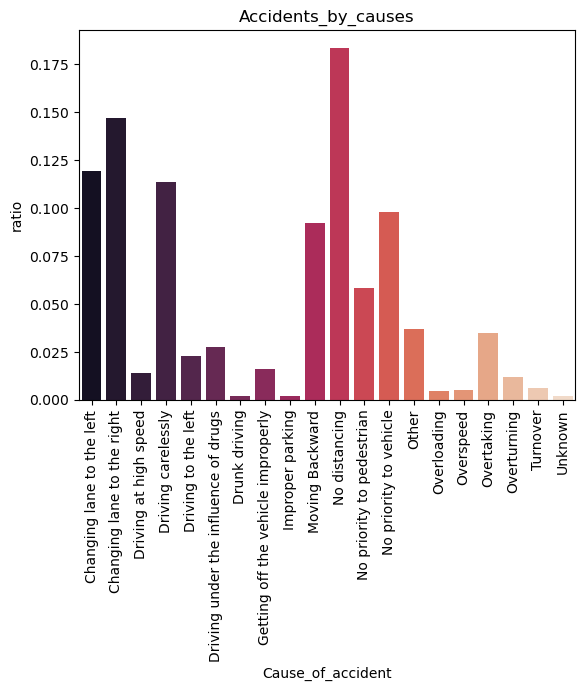

In [69]:
plt.xticks(rotation='vertical')
plt.title('Accidents_by_causes')
sns.barplot(mask2, x='Cause_of_accident', y='ratio', errorbar=None, palette='rocket')